# Assignment 3

Roll No : 2018113003 <br>
Subject : Systems Biology

## Question 1

Simulate to show FCD by FLL described by the following :

### Equation A

$\frac{dz}{dt} = ksz*\frac{x}{y} - kdz*z$

### Equation B

$\frac{dz}{dt} = ksz*x - kdz*z*y$

## Looking For

Fold detection is observed when change in concentration of inputs X,Y do not influence the resultant signal.

In [19]:
## Imports
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def FCD_plot(factor : int = 1,ts : int = 500,eq : bool = 0):
    '''
    Gives the input and output variables which correspond to the equations given above.

    Parameters:
    -----------
    factor : the relative scaling of inputs X&Y
    ts : timestep between the two points where data is taken
    eq : 0 -> Simulating first equation, else the second one

    Returns:
    --------
    t : The numpy array which returns the values of t
    x : The numpy array which returns the values of x
    y : The numpy array which returns the values of y
    z : The numpy array which returns the values of z
    '''
    ## Parameters

    ## Y Params
    [a_y,b_y] = [6/ts,6/ts]

    ## Z Params
    [a_z,b_z,g_z] = [18/ts,18/ts,0]
    
    # Time Steps
    t = np.linspace(-10,100,ts)
    
    # X Input Signal
    x = np.array([])
    for time in t:
        x = np.append(x,(4*(time > 0) + 1)*factor)
    
    # Y Input Signal
    y = np.array([1*factor])
    for x_t in x[:-1]:
        y = np.append(y,b_y*x_t - (a_y)*y[-1] + y[-1])
    
    # Z output signals
    z = np.array([0])
    v_tup = zip(x[:-1],y[:-1],t[:-1])
    for x_t,y_t,t_s in v_tup:
        if eq == 0:
            if(t_s>0):
                z = np.append(z,b_z*x_t/(g_z+y_t) - (a_z)*z[-1] + z[-1])
            else:
                z = np.append(z,0)
        else:
            if(t_s>0):
                z = np.append(z,b_z*x_t - a_z*z[-1]*(g_z+y_t) + z[-1])
            else:
                z = np.append(z,0)

    return t,x,y,z*10

## Simulation 1

$\frac{dz}{dt} = ksz*\frac{x}{y} - kdz*z$

### Solution

In this equation it can be clearly seen that the ration of X and Y is taken and thus the individual values of them do not matter, thus exhibits fold change as shown in graphs below.

Concentration X in range (1,5)  :


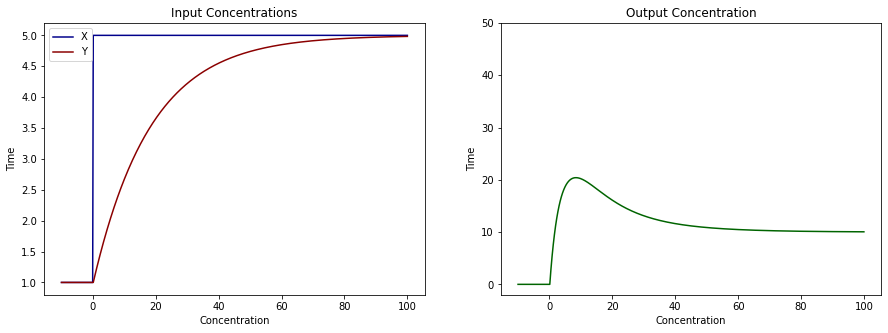

In [29]:
t,x,y,z1 = FCD_plot(factor = 1,ts = 600,eq = 0)
print('Concentration X in range (1,5)  :')

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(t,x,'darkblue',label='X')
plt.plot(t,y,'darkred',label='Y')
plt.title('Input Concentrations')
plt.xlabel('Concentration')
plt.ylabel('Time')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t,z1,'darkgreen',label='Z')
plt.title('Output Concentration')
plt.xlabel('Concentration')
plt.ylabel('Time')
plt.ylim(-2,50)
plt.show()

Concentration X in range (10,50)  :


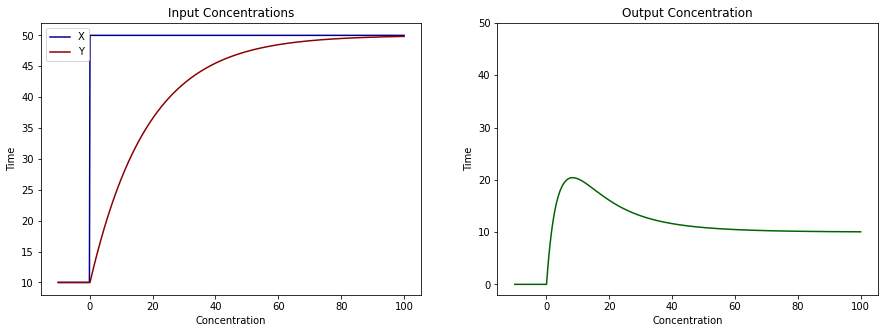

In [28]:
t,x,y,z2 = FCD_plot(factor = 10,ts = 600,eq = 0)

print('Concentration X in range (10,50)  :')

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(t,x,'darkblue',label='X')
plt.plot(t,y,'darkred',label='Y')
plt.title('Input Concentrations')
plt.xlabel('Concentration')
plt.ylabel('Time')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t,z2,'darkgreen',label='Z')
plt.title('Output Concentration')
plt.xlabel('Concentration')
plt.ylabel('Time')
plt.ylim(-2,50)
plt.show()

## Result

It can be seen from the above graphs that both the concentrations of $Z_1$ and $Z_2$ are same, thus correctly identifying fold change.

## Simulation 2

$\frac{dz}{dt} = ksz*x - kdz*z*y$

### Solution

In this equation it can be clearly seen that the increase in concentration will increase the concentration of Z and thus cannot correctly identify fold change. The math is :

$\frac{dz}{dt} = ksz*x - kdz*z*y$<br><br>
For $X = \alpha X$ and $Y = \alpha Y$  : <br><br>
$\frac{dz}{dt} = ksz*\alpha x - kdz*z*\alpha y$ <br>
$\frac{dz}{dt} = \alpha(ksz*x - kdz*z*y)$

Concentration X in range (1,5)  :


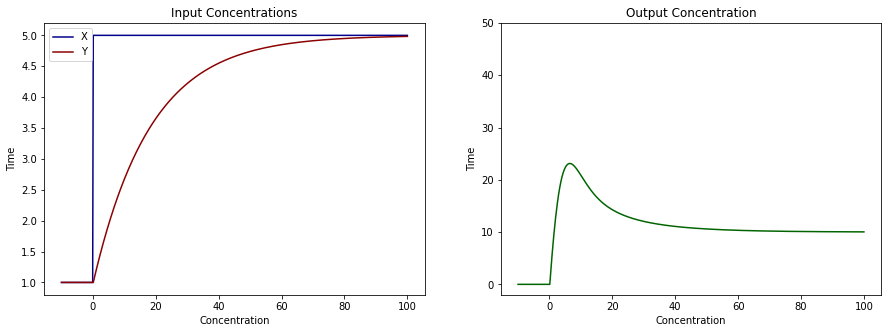

In [27]:
t,x,y,z1 = FCD_plot(factor = 1,ts = 600,eq = 1)
print('Concentration X in range (1,5)  :')

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(t,x,'darkblue',label='X')
plt.plot(t,y,'darkred',label='Y')
plt.title('Input Concentrations')
plt.xlabel('Concentration')
plt.ylabel('Time')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t,z1,'darkgreen',label='Z')
plt.title('Output Concentration')
plt.xlabel('Concentration')
plt.ylabel('Time')
plt.ylim(-2,50)
plt.show()

Concentration X in range (10,50)  :


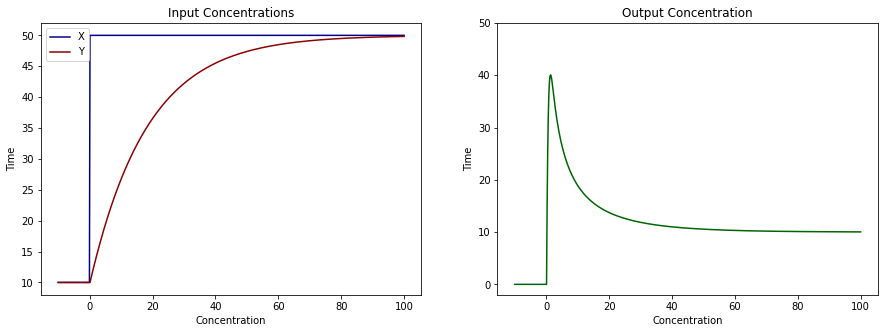

In [26]:
t,x,y,z2 = FCD_plot(factor = 10,ts = 600,eq = 1)

print('Concentration X in range (10,50)  :')

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(t,x,'darkblue',label='X')
plt.plot(t,y,'darkred',label='Y')
plt.title('Input Concentrations')
plt.xlabel('Concentration')
plt.ylabel('Time')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t,z2,'darkgreen',label='Z')
plt.title('Output Concentration')
plt.xlabel('Concentration')
plt.ylabel('Time')
plt.ylim(-2,50)
plt.show()

## Parameters for Fold Change Detection

As seen above, equation 1 always shows fold change as when X and Y are scaled with a common ratio, the first equation remains same as it only depends on X/Y. \newline

The base equation for exclusive binding is as follows : \newline
$\frac{\partial Z}{\partial t} = \frac{X/K_1}{1 + X/K_1 + Y/K_2} - \alpha Z$\newline

It reduces to the first equation under the conditions :\newline
$\frac{Y}{K_2} \gg 1$ and $\frac{X}{K_1} \ll \frac{Y}{K_2}$\newline

From this it can be deduced that activatior response is linear (wrt X) and repressor (Y) is large enough to saturate the promoter (Z). \newline

For independant binding, the base equation is :\newline
$\frac{\partial Z}{\partial t} = \frac{X/K_1}{(1 + X/K_1)(1 + Y/K_2)} - \alpha Z$ \newline

This equation will show fold detection under the conditions : \newline
$\frac{X}{K_1} \ll 1$\newline

This will reduce the equation to : \newline
$\frac{\partial Z}{\partial t} = \frac{X/K_1}{1 + Y/K_2}$\newline

For cooperative binding, the base equation is :\newline
$\frac{\partial Z}{\partial t} = \frac{X/K_1}{1 + X/K_1 + Y/K_2 + XY/K_3}$ \newline

This equation will show fold detection under the conditions : \newline
$\frac{X}{K_1} \ll 1$ and $\frac{Y}{K_2} \gg \frac{XY}{K_3}$\newline

Thus the overall constraints are as follows :\newline
$\frac{Y}{K_2} \gg 1 + \frac{X}{K_1} + \frac{XY}{K_3}$